<a href="https://colab.research.google.com/github/Solxcero/_SeSac_/blob/main/2_handwriting_word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요라이브러리

In [ ]:
import json
import random
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
%cd /content
!git clone 'https://github.com/Solxcero/-deep-text-recognition-benchmark.git'
%cd /content/-deep-text-recognition-benchmark/

!mkdir data
!mkdir /content/-deep-text-recognition-benchmark/data/train
!mkdir /content/-deep-text-recognition-benchmark/data/test
!mkdir /content/-deep-text-recognition-benchmark/data/validation

!unzip '/content/drive/MyDrive/project/hadwriting/01_handwriting_word_images.zip' -d ./data/


In [ ]:
%cd /content/-deep-text-recognition-benchmark/

!mkdir saved_models_1

In [ ]:
!mkdir /content/-deep-text-recognition-benchmark/saved_models_1/TPS-ResNet-BiLSTM-CTC-Seed1111_1

In [ ]:
file = json.load(open('/content/drive/MyDrive/project/hadwriting/handwriting_data_info_clean.json'))
file.keys() #dict_keys(['info', 'images', 'annotations', 'licenses'])
file['info'] 

{'name': '한글 손글씨 데이터', 'date_created': '2019-09-18 04:45:22'}

In [ ]:
words = [f for f in file['annotations'] if f['attributes']['type']=='단어(어절)']
print(f'단어(어절) 데이터 : {len(words)}')


단어(어절) 데이터 : 359997


In [ ]:
0.4/8

0.05

In [ ]:
# import random
# import os

ocr_words_files = os.listdir('/content/-deep-text-recognition-benchmark/data/1_word/')
# len(ocr_words_files) # 359997

#1000고정
random.seed(1000)
random.shuffle(ocr_words_files)

#8:2 맞추기
n_train = int(len(ocr_words_files) * 0.1)
n_validation = int(len(ocr_words_files) * 0.0125)  #
n_test = int(len(ocr_words_files) * 0.0125)

n_train_2 = int(len(ocr_words_files) * 0.2)
n_validation_2 = int(len(ocr_words_files) * 0.05)  #
n_test_2 = int(len(ocr_words_files) * 0.005)


print(f'train_1 : {n_train}\nvalidation_1 : {n_validation}\ntest_1 : {n_test}') #
print(f'sum_1 : {n_train+n_validation+n_test}\n\n')

print(f'train_2 : {n_train_2}\nvalidation_2 : {n_validation_2}\ntest_2 : {n_test_2}\n\n') #


print(f'train추가 : {n_train_2-n_train}\nvalidation추가 : {n_validation_2-n_validation}')
print(f'sum_2 : {n_train_2-n_train+n_validation_2-n_validation}')

train_1 : 35999
validation_1 : 4499
test_1 : 4499
sum_1 : 44997


train_2 : 71999
validation_2 : 17999
test_2 : 1799


train추가 : 36000
validation추가 : 13500
sum_2 : 49500


In [ ]:
n_train_2 > n_train+n_validation

True

In [ ]:
train_files_1 = ocr_words_files[:n_train]
validation_files_1 = ocr_words_files[n_train: n_train+n_validation]
test_files_1 = ocr_words_files[-n_test:]

train_files_2 = ocr_words_files[n_train+n_validation:n_train_2+n_validation]
validation_files_2 = ocr_words_files[n_train_2+n_validation: n_train_2+n_validation_2]
test_files_2 = ocr_words_files[-n_test_2:]


print(f'train_files : {len(train_files_2)}\nvalidation_files : {len(validation_files_2)}')

train_files : 36000
validation_files : 13500


In [ ]:
import pandas as pd
mat = pd.DataFrame({'1':train_files_1[-10:],'2': reversed(train_files_2[:10])})
mat['f/t'] = mat['1'] == mat['2']
mat

,1,2,f/t
0,00426349.png,00868318.png,False
1,00577482.png,00925780.png,False
2,00871889.png,00368556.png,False
3,00334229.png,00221404.png,False
4,01013598.png,00433911.png,False
5,00808596.png,00431355.png,False
6,00828383.png,00463330.png,False
7,00695898.png,01069169.png,False
8,00052883.png,00647311.png,False
9,00463991.png,00051955.png,False


In [ ]:
# from tqdm import tqdm
%cd /content/-deep-text-recognition-benchmark/data/

## train/validation/test 이미지들에 해당하는 id 값을 저장

train_img_ids = {}
validation_img_ids = {}
test_img_ids = {}

for image in tqdm(file['images'],desc='id 저장'):
    if image['file_name'] in train_files_2:
        train_img_ids[image['file_name']] = image['id']
    elif image['file_name'] in validation_files_2:
        validation_img_ids[image['file_name']] = image['id']
    elif image['file_name'] in test_files_2:
        test_img_ids[image['file_name']] = image['id']

## train/validation/test 이미지들에 해당하는 annotation 들을 저장

train_annotations = {f:[] for f in train_img_ids.keys()}
validation_annotations = {f:[] for f in validation_img_ids.keys()}
test_annotations = {f:[] for f in test_img_ids.keys()}

train_ids_img = {train_img_ids[id_]:id_ for id_ in train_img_ids}
validation_ids_img = {validation_img_ids[id_]:id_ for id_ in validation_img_ids}
test_ids_img = {test_img_ids[id_]:id_ for id_ in test_img_ids}

for idx, annotation in tqdm(enumerate(file['annotations']),desc='annotation 저장'):
    # if idx % 5000 == 0:
        # print(idx,'/',len(file['annotations']),'processed')
    if annotation['attributes']['type'] != '단어(어절)': #단어 타입이 아니면
        continue
    if annotation['image_id'] in train_ids_img:
        train_annotations[train_ids_img[annotation['image_id']]].append(annotation)
    elif annotation['image_id'] in validation_ids_img:
        validation_annotations[validation_ids_img[annotation['image_id']]].append(annotation)
    elif annotation['image_id'] in test_ids_img:
        test_annotations[test_ids_img[annotation['image_id']]].append(annotation)

with open('train_annotation.json', 'w') as file:
    json.dump(train_annotations, file)
with open('validation_annotation.json', 'w') as file:
    json.dump(validation_annotations, file)
with open('test_annotation.json', 'w') as file:
    json.dump(test_annotations, file)

/content/-deep-text-recognition-benchmark/data


id 저장: 100%|██████████| 1142045/1142045 [32:00<00:00, 594.74it/s]
annotation 저장: 1142045it [00:00, 1530547.93it/s]


In [ ]:
# import json
# import os
# import cv2
# import matplotlib.pyplot as plt
# from tqdm import tqdm

## aihub 데이터 annotation을 읽어서 단어 단위로 잘라서 data에 저장하기

data_root_path = '/content/-deep-text-recognition-benchmark/data/1_word/'
save_root_path = '/content/-deep-text-recognition-benchmark/data/'

test_annotations = json.load(open('/content/-deep-text-recognition-benchmark/data/test_annotation.json'))
gt_file = open(save_root_path+'gt_test.txt', 'w')
for file_name in tqdm(test_annotations,desc='test'):
    annotations = test_annotations[file_name]
    image = cv2.imread(data_root_path+file_name)    
    text = annotations[0]['text']      
    cv2.imwrite(save_root_path+'test/'+file_name,image)
    gt_file.write("test/{}\t{}\n".format(file_name, text))

validation_annotations = json.load(open('/content/-deep-text-recognition-benchmark/data/validation_annotation.json'))
gt_file = open(save_root_path+'gt_validation.txt', 'w')
for file_name in tqdm(validation_annotations,desc='validation'):
    annotations = validation_annotations[file_name]
    image = cv2.imread(data_root_path+file_name)    
    text = annotations[0]['text']       
    cv2.imwrite(save_root_path+'validation/'+file_name,image )
    gt_file.write("validation/{}\t{}\n".format(file_name, text))
        
train_annotations = json.load(open('/content/-deep-text-recognition-benchmark/data/train_annotation.json'))
gt_file = open(save_root_path+'gt_train.txt', 'w')
for file_name in tqdm(train_annotations,desc='train'):
    annotations = train_annotations[file_name]
    image = cv2.imread(data_root_path+file_name)   
    text = annotations[0]['text']       
    cv2.imwrite(save_root_path+'train/'+file_name,image)
    gt_file.write("train/{}\t{}\n".format(file_name, text))

train: 100%|██████████| 36000/36000 [01:53<00:00, 316.16it/s]


In [ ]:
!pip install lmdb
!pip install fire
import fire
import cv2
import lmdb,torch,torchvision, nltk ,natsort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.6 MB/s 
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=96f40c1f7faa74123c83aff4f618e03bf7a880a59fc8ef7a6a2f7a23488a42cb
  Stored in directory: /root/.cache/pip/wheels/5b/eb/43/7295e71293b218ddfd627f935229bf54af9018add7fbb5aac6
Successfully built fire


In [ ]:
%cd /content/-deep-text-recognition-benchmark

/content/-deep-text-recognition-benchmark


In [ ]:
!python create_lmdb_dataset.py --inputPath data/ --gtFile data/gt_train.txt --outputPath data_lmdb/train
!python create_lmdb_dataset.py --inputPath data/ --gtFile data/gt_validation.txt --outputPath data_lmdb/validation

# !python create_lmdb_dataset.py --inputPath data/ --gtFile data/gt_test.txt --outputPath data_lmdb/test

Created dataset with 35805 samples
Created dataset with 13500 samples


In [ ]:
%%time
!CUDA_VISIBLE_DEVICES=0,1,2 python3 train.py --train_data data_lmdb/train --valid_data data_lmdb/validation \
	--saved_model /content/drive/MyDrive/project/handwriting_code/best_accuracy.pth \
	--num_iter 20000 --valInterval 2500 \
	--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction CTC \
	--data_filtering_off --workers 0 --imgH 64 --imgW 200

--------------------------------------------------------------------------------
dataset_root: data_lmdb/train
opt.select_data: ['/']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    data_lmdb/train	 dataset: /
sub-directory:	/.	 num samples: 35805
num total samples of /: 35805 x 1.0 (total_data_usage_ratio) = 35805
num samples of / per batch: 64 x 1.0 (batch_ratio) = 64
--------------------------------------------------------------------------------
Total_batch_size: 64 = 64
--------------------------------------------------------------------------------
dataset_root:    data_lmdb/validation	 dataset: /
sub-directory:	/.	 num samples: 13500
--------------------------------------------------------------------------------
model input parameters 64 200 20 1 512 256 1047 50 TPS ResNet BiLSTM CTC
Skip Transformation.LocalizationNetwork.localization_fc2.weight as it is already initialized
Skip Transformation.Localizatio

## Test

In [ ]:
!CUDA_VISIBLE_DEVICES=0,1,2 python3 demo.py --image_folder data/test --saved_model /content/-deep-text-recognition-benchmark/saved_models/TPS-ResNet-BiLSTM-CTC-Seed1111/best_accuracy.pth \
    --Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction CTC \
    --workers 0 --batch_max_length 50 --imgH 64 --imgW 200

model input parameters 64 200 20 1 512 256 1047 50 TPS ResNet BiLSTM CTC
loading pretrained model from /content/-deep-text-recognition-benchmark/saved_models/TPS-ResNet-BiLSTM-CTC-Seed1111/best_accuracy.pth
--------------------------------------------------------------------------------
image_path               	predicted_labels         	confidence score
--------------------------------------------------------------------------------
data/test/00012897.png   	갑                        	0.8917
data/test/00012923.png   	강화하다                     	0.3783
data/test/00013041.png   	그이                       	0.9914
data/test/00013056.png   	수십                       	0.9929
data/test/00013071.png   	수집하다                     	0.7322
data/test/00013252.png   	훈전                       	0.3031
data/test/00013302.png   	부드럽다                     	0.9030
data/test/00013385.png   	나오다                      	0.9646
data/test/00013531.png   	둘                        	0.8350
data/test/00013541.png   	뒤지다  

In [ ]:
!CUDA_VISIBLE_DEVICES=0,1,2 python3 demo.py --image_folder data/test --saved_model /content/-deep-text-recognition-benchmark/saved_models/TPS-ResNet-BiLSTM-CTC-Seed1111/best_accuracy.pth \
    --Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction CTC \
    --workers 0 --batch_max_length 50 --imgH 64 --imgW 200

model input parameters 64 200 20 1 512 256 1047 50 TPS ResNet BiLSTM CTC
loading pretrained model from /content/-deep-text-recognition-benchmark/saved_models/TPS-ResNet-BiLSTM-CTC-Seed1111/best_accuracy.pth
--------------------------------------------------------------------------------
image_path               	predicted_labels         	confidence score
--------------------------------------------------------------------------------
data/test/00013071.png   	수집하다                     	0.9975
data/test/00013385.png   	나오다                      	0.9500
data/test/00013531.png   	둘                        	0.9984
data/test/00013663.png   	오가다                      	0.9996
data/test/00013951.png   	버려지다                     	0.9841
data/test/00014062.png   	닫다                       	0.9971
data/test/00014173.png   	얼다                       	0.9683
data/test/00014267.png   	약                        	0.9996
data/test/00014484.png   	간호사                      	0.9992
data/test/00014794.png   	싫어지다 

In [ ]:
ouput = !CUDA_VISIBLE_DEVICES=0,1,2 python3 demo.py --image_folder data/real_test --saved_model /content/-deep-text-recognition-benchmark/saved_models/TPS-ResNet-BiLSTM-CTC-Seed1111/best_accuracy.pth \
    --Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction CTC \
    --workers 0  --imgH 64 --imgW 200

,img,id,label,conf
0,,data/real_test/고기.png,고기,1.0000
1,,data/real_test/그래.png,그래,0.9999
2,,data/real_test/똑똑이.png,똑같미,0.3291
3,,data/real_test/솔트룩스.png,슬프토스,0.0814

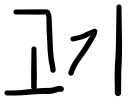
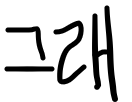
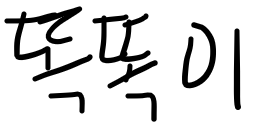
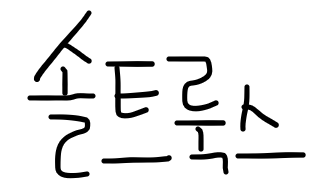

In [ ]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import io
import pandas as pd

data = pd.DataFrame()
for ind, row in enumerate(ouput[ouput.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
  row = row.split('\t')
  filename = row[0].strip()
  label = row[1].strip()
  conf = row[2].strip()
  img = Image.open(filename)
  img_buffer = io.BytesIO()
  img.save(img_buffer, format="PNG")
  imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8") 

  data.loc[ind, 'img'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
  data.loc[ind, 'id'] = filename
  data.loc[ind, 'label'] = label
  data.loc[ind, 'conf'] = conf

html_all = data.to_html(escape=False)
display(HTML(html_all))